In [2]:
from argparse import Namespace

from utils.SAMMed3D_segment_anything.build_sam import sam_model_registry
from classes.SAMClass import SAMWrapper, SAMInferer

import utils.promptUtils as prUt
import utils.analysisUtils as anUt
from utils.imageUtils import read_im_gt

def load_sam(checkpoint_path, device):
    args = Namespace()
    args.image_size = 256
    args.sam_checkpoint = checkpoint_path
    args.model_type = 'vit_h'
    model = sam_model_registry[args.model_type](args).to(device)
    return(model)

# Obtain model, image, gt
device = 'cuda'
checkpoint_path = '/home/t722s/Desktop/UniversalModels/TrainedModels/sam_vit_h_4b8939.pth'

sam_model = load_sam(checkpoint_path, device)
sam_wrapper = SAMWrapper(sam_model, device)
inferer = SAMInferer(sam_wrapper, device)

# Load in image, label, prompt
# img_path = '/home/t722s/Desktop/Datasets/BratsMini/imagesTs/BraTS2021_01646.nii.gz'
# gt_path = '/home/t722s/Desktop/Datasets/BratsMini/labelsTs/BraTS2021_01646.nii.gz'
# img, gt = read_im_gt(img_path, gt_path)

img_path = '/home/t722s/Desktop/Datasets/amosForUniversegTest/imagesTs/amos_0001.nii.gz'
gt_path = '/home/t722s/Desktop/Datasets/amosForUniversegTest/labelsTs/amos_0001.nii.gz'
img, gt = read_im_gt(img_path, gt_path, 2)


*******interpolate
*******load /home/t722s/Desktop/UniversalModels/TrainedModels/sam_vit_h_4b8939.pth


OutOfMemoryError: CUDA out of memory. Tried to allocate 26.00 MiB. GPU 0 has a total capacty of 10.75 GiB of which 46.81 MiB is free. Process 8128 has 5.21 GiB memory in use. Process 8287 has 2.49 GiB memory in use. Including non-PyTorch memory, this process has 2.27 GiB memory in use. Of the allocated memory 2.06 GiB is allocated by PyTorch, and 58.02 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
# Experiment: n randomly sampled points from foreground
seed = 11121
n=5
pts_prompt = prUt.get_pos_clicks2D_row_major(gt, n, seed = seed)
segmentation = inferer.predict(img, pts_prompt)
anUt.compute_dice(segmentation, gt)

NameError: name 'prUt' is not defined

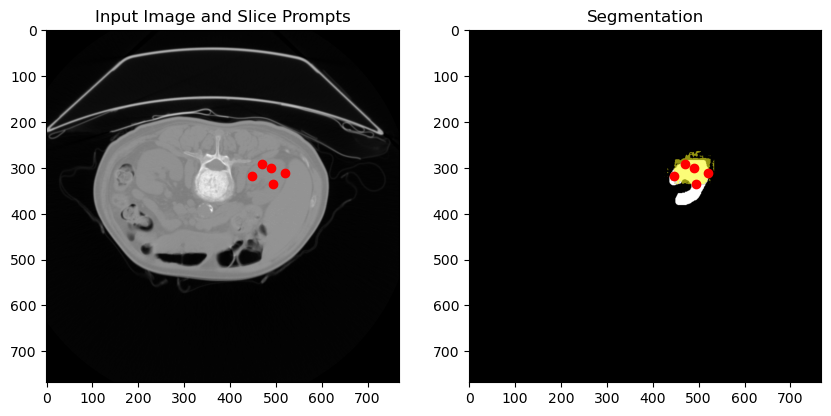

0.6819787985865724

In [2]:
# Slice visualisation:
slice_idx = 60
anUt.show_seg_row_major(slice_idx, img, gt, segmentation, pts_prompt= pts_prompt)